<h2><center> <span style = "font-family: Babas; font-size: 2em;">Perfect Classifier : Machine Learning Marathon[2nd Rank]</span> </center></h2>
<h4><center> <span style = "font-family: Babas; font-size: 2em; font-style: italic"> Devendra Parihar </span> </center></h4>
<!-- <h4><center> <span style = "font-family: Babas; font-size: 2em;"> Sugata Ghosh </span> </center></h4> -->

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, classification_report, fbeta_score

#to filter future warning annd remove them
import warnings
warnings.filterwarnings('ignore')

# Define seed for repeatability
SEED = 42
np.random.seed(SEED)

# Data Reading(training and testing data)

In [2]:
# Read in train data
train_df = pd.read_csv('../input/ml-marathon-dataset-by-azure-developer-community/data.csv')
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [3]:
print(train_df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [4]:
# Read in test data
test_df = pd.read_csv('../input/ml-marathon-dataset-by-azure-developer-community/test_data.csv')
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown


# Explore training & testing data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


We have no missing information. According to the data dictionary missing values are labeled as `unknown`.

In [6]:
train_df['age'].describe()

count    8371.000000
mean       41.197467
std        11.809300
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='poutcome', ylabel='count'>

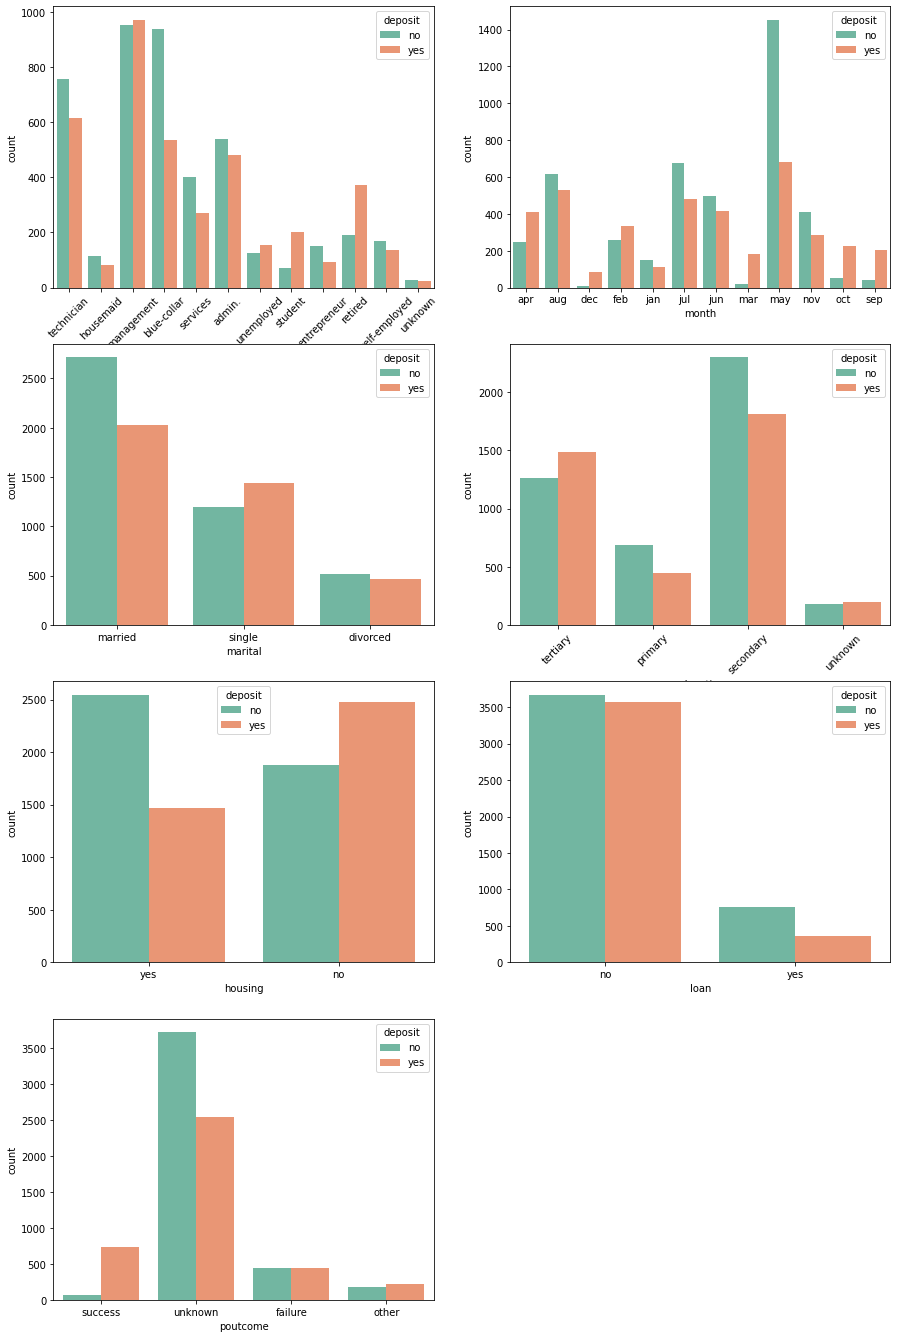

In [7]:
#Yes and No vs (Job, Month, Marital status, Education, poutcome, Housing, Contact, default)

plt.figure(figsize = (15, 30))
sx = plt.subplot(5,2,1)
sns.countplot(x="job",hue="deposit", data=train_df, palette="Set2")
sx.set_xticklabels(sx.get_xticklabels(),rotation=45)
sx = plt.subplot(5,2,2)

bde_copy = train_df.copy()
bde_copy.month = bde_copy.month.astype("category")
bde_copy.month.cat.set_categories(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], inplace=True)

sns.countplot(x="month",hue="deposit", data=train_df.sort_values(['month']), palette="Set2")
sx = plt.subplot(5,2,3)
sns.countplot(x="marital",hue="deposit", data=train_df, palette="Set2")
sx = plt.subplot(5,2,4)
sns.countplot(x="education",hue="deposit", data=train_df, palette="Set2")
sx.set_xticklabels(sx.get_xticklabels(),rotation=45)
sx = plt.subplot(5,2,5)
sns.countplot(x="housing",hue="deposit", data=train_df, palette="Set2")
sx = plt.subplot(5,2,6)
sns.countplot(x="loan",hue="deposit", data=train_df, palette="Set2")
sx = plt.subplot(5,2,7)
sns.countplot(x="poutcome",hue="deposit", data=train_df, palette="Set2")

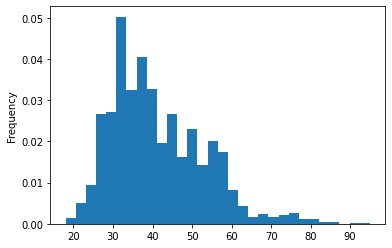

In [8]:
train_df['age'].plot.hist(bins=30, density=True)
plt.show()

In [9]:
train_df['job'].value_counts(normalize=True)

management       0.229722
blue-collar      0.175845
technician       0.163780
admin.           0.121491
services         0.080158
retired          0.067256
self-employed    0.036674
unemployed       0.033688
student          0.032613
entrepreneur     0.029148
housemaid        0.023534
unknown          0.006092
Name: job, dtype: float64

In [10]:
train_df['marital'].value_counts(normalize=True)

married     0.566718
single      0.315972
divorced    0.117310
Name: marital, dtype: float64

In [11]:
train_df['education'].value_counts(normalize=True)

secondary    0.491339
tertiary     0.328993
primary      0.134751
unknown      0.044917
Name: education, dtype: float64

In [12]:
train_df['default'].value_counts(normalize=True)

no     0.984829
yes    0.015171
Name: default, dtype: float64

In [13]:
train_df['balance'].describe()

count     8371.000000
mean      1517.811134
std       3225.312218
min      -3058.000000
25%        116.000000
50%        532.000000
75%       1694.000000
max      81204.000000
Name: balance, dtype: float64

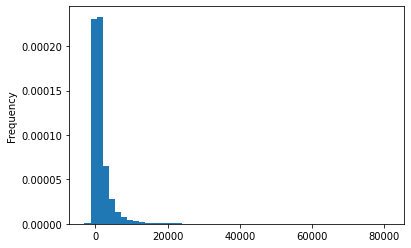

In [14]:
train_df['balance'].plot.hist(bins=50, density=True)
plt.show()

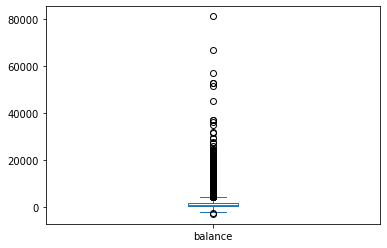

In [15]:
train_df['balance'].plot.box()
plt.show()

We do have outliers in the balance column. There are a few ways to deal with the outliers:
- We set a maximum value, say at 90 percentile. Additionally, create a new column that indicates the balance value is greater than the threshold.
- We let the values be and hope the model is robust to the outliers.

In [16]:
train_df['housing'].value_counts(normalize=True)

no     0.520129
yes    0.479871
Name: housing, dtype: float64

In [17]:
train_df['loan'].value_counts(normalize=True)

no     0.866085
yes    0.133915
Name: loan, dtype: float64

In [18]:
train_df['contact'].value_counts(normalize=True)

cellular     0.721658
unknown      0.210608
telephone    0.067734
Name: contact, dtype: float64

In [19]:
train_df['day'].value_counts(normalize=True)

20    0.051965
18    0.050412
5     0.043245
15    0.043125
30    0.041811
12    0.041333
13    0.040975
6     0.040139
14    0.039900
21    0.039661
8     0.038347
28    0.037869
4     0.036077
17    0.035241
11    0.034285
7     0.034285
16    0.033807
19    0.033449
29    0.032732
9     0.031896
2     0.030821
3     0.027356
27    0.024848
22    0.022458
23    0.022100
26    0.021861
25    0.020189
10    0.014694
31    0.012902
24    0.011468
1     0.010751
Name: day, dtype: float64

In [20]:
train_df['day'].value_counts(normalize=True).describe()

count    31.000000
mean      0.032258
std       0.010951
min       0.010751
25%       0.023653
50%       0.034285
75%       0.040019
max       0.051965
Name: day, dtype: float64

In [21]:
train_df['month'].value_counts(normalize=True)

may    0.255047
jul    0.137618
aug    0.137379
jun    0.108948
nov    0.083383
apr    0.078963
feb    0.071079
oct    0.033449
jan    0.030701
sep    0.028790
mar    0.023773
dec    0.010871
Name: month, dtype: float64

Customers are rarely contacted in the month of `December`. This makes sense, it is the holiday season and customers would not like to be bothered during this time of the year. But given December is a festive month, are customers more likely to say yes during this time?

In [22]:
train_df['duration'].describe()

count    8371.000000
mean      372.898698
std       346.706743
min         2.000000
25%       137.000000
50%       255.000000
75%       504.000000
max      3284.000000
Name: duration, dtype: float64

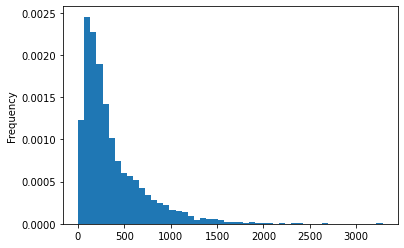

In [23]:
train_df['duration'].plot.hist(bins=50, density=True)
plt.show()

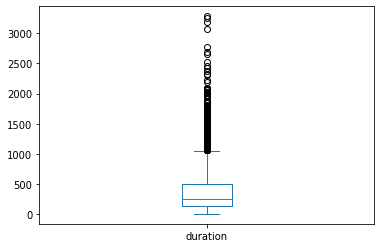

In [24]:
train_df['duration'].plot.box()
plt.show()

The distribution of duration is similar to that of balance. We can clip the outliers and create an additional column to record this information.

In [25]:
# Investigate duration values that are 0
train_df[train_df['duration'] == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


If the customer was contacted but never answered his/her phone the `duration` value can be `0`

In [26]:
train_df['campaign'].describe()

count    8371.000000
mean        2.512603
std         2.734037
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        63.000000
Name: campaign, dtype: float64

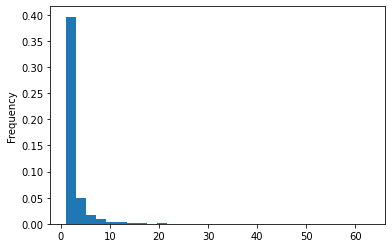

In [27]:
train_df['campaign'].plot.hist(bins=30, density=True)
plt.show()

In [28]:
train_df['pdays'].describe()

count    8371.000000
mean       49.911958
std       107.308417
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         2.000000
max       854.000000
Name: pdays, dtype: float64

In [29]:
# Investigate first time contact
print(train_df.loc[train_df['pdays'] == -1, 'pdays'].count())
print(train_df.loc[train_df['pdays'] == -1, 'pdays'].count()/train_df.shape[0]*100)

6268
74.87755345836817


81% of customers were contacted for the first time.

In [30]:
# Investigate repeat contacts
train_df.loc[train_df['pdays'] != -1, 'pdays'].describe()

count    2103.000000
mean      201.655254
std       122.825116
min         1.000000
25%        97.000000
50%       182.000000
75%       277.000000
max       854.000000
Name: pdays, dtype: float64

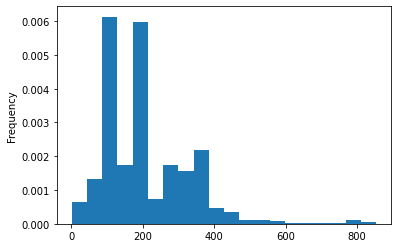

In [31]:
train_df.loc[train_df['pdays'] != -1, 'pdays'].plot.hist(bins=20, density=True)
plt.show()

In [32]:
train_df['previous'].value_counts()

0     6268
1      648
2      521
3      333
4      183
5      122
6       79
7       50
8       48
9       25
11      20
10      19
12      12
17       8
13       8
14       5
19       3
15       3
16       2
23       2
20       2
27       2
40       1
58       1
26       1
21       1
22       1
30       1
41       1
55       1
Name: previous, dtype: int64

- Majority of the values are 0. This matches with what we found with `pdays`. 
- One customer was contacted 275 times. This looks like a data error. We will replace this value with the mean of non-zero values.

In [33]:
train_df.loc[train_df['previous'] == 275, 'previous'] = train_df.loc[train_df['previous'] != 0, 'previous'].median()
train_df['previous'].describe()

count    8371.000000
mean        0.823677
std         2.315285
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        58.000000
Name: previous, dtype: float64

In [34]:
np.percentile(train_df.loc[train_df['previous'] != 0, 'previous'], q=95)

9.0

In [35]:
train_df.loc[train_df['previous'] >= 9, 'deposit'].value_counts()

yes    76
no     43
Name: deposit, dtype: int64

In [36]:
train_df['poutcome'].value_counts(normalize=True)

unknown    0.748895
failure    0.106917
success    0.096404
other      0.047784
Name: poutcome, dtype: float64

In [37]:
train_df.groupby(['poutcome', 'deposit'])['deposit'].count()

poutcome  deposit
failure   no          447
          yes         448
other     no          181
          yes         219
success   no           73
          yes         734
unknown   no         3727
          yes        2542
Name: deposit, dtype: int64

Build a machine learning model using the data as it is. After we set a baseline we apply feature engineering techniques to try and improve the performance of the model.

In [38]:
# Create train_x dataframe
train_x = train_df.iloc[:, :-1]
train_x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure


In [39]:
# Create train_y dataframe
train_y = train_df[['deposit']]
train_y.head()

,deposit
0,no
1,no
2,yes
3,no
4,no


In [40]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.0+ MB


In [41]:
# Get a list of columns for one-hot encoding
ohe_cols = list(train_x.select_dtypes(include='object').columns.values)

# We want to label encode education
le_col = ['education']

# Drop education 
ohe_cols.remove('education')
ohe_cols

['job',
 'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [42]:
train_x = pd.get_dummies(train_x, prefix=ohe_cols, columns=ohe_cols, drop_first=True)
train_x.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,38,tertiary,127,14,113,1,50,2,0,0,...,0,0,0,0,0,1,0,0,1,0
1,41,primary,365,8,203,5,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39,tertiary,2454,4,716,3,263,2,0,0,...,0,0,0,1,0,0,0,0,0,0
3,49,primary,6215,11,549,1,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,37,secondary,1694,29,404,2,251,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Perform label encoding on education
ed_cat = {'unknown': 0, 
          'primary': 1,
          'secondary': 2,
          'tertiary': 3}
train_x['education'] = train_x['education'].replace(ed_cat)
train_x['education'].value_counts(normalize=True)

2    0.491339
3    0.328993
1    0.134751
0    0.044917
Name: education, dtype: float64

In [44]:
train_x.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,38,3,127,14,113,1,50,2,0,0,...,0,0,0,0,0,1,0,0,1,0
1,41,1,365,8,203,5,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39,3,2454,4,716,3,263,2,0,0,...,0,0,0,1,0,0,0,0,0,0
3,49,1,6215,11,549,1,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,37,2,1694,29,404,2,251,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Encode target variable
y_cat = {'no': 0, 
         'yes': 1}
train_y['deposit'] = train_y['deposit'].replace(y_cat)
train_y['deposit'].value_counts(normalize=True)

0    0.528969
1    0.471031
Name: deposit, dtype: float64

In [46]:
# Create the test_x dataframe
test_x = train_df.iloc[:, :-1]

# # # Create train_y dataframe
# test_y = test_df[['deposit']]
test_y = train_df[['deposit']]

# # One-hot encode columns
test_x = pd.get_dummies(test_x, prefix=ohe_cols, columns=ohe_cols, drop_first=True)

# # Label encode education
test_x['education'] = test_x['education'].replace(ed_cat)

# test_y = train_
test_y['deposit'] = test_y['deposit'].replace(y_cat)

In [47]:
test_x.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,38,3,127,14,113,1,50,2,0,0,...,0,0,0,0,0,1,0,0,1,0
1,41,1,365,8,203,5,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39,3,2454,4,716,3,263,2,0,0,...,0,0,0,1,0,0,0,0,0,0
3,49,1,6215,11,549,1,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,37,2,1694,29,404,2,251,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
test_y.head()

,deposit
0,0
1,0
2,1
3,0
4,0


# Decision Tree Classifier

In [49]:
# Define the model
dc = DecisionTreeClassifier(max_depth=30, min_samples_split=10, min_samples_leaf=10,
                            random_state=SEED, class_weight="balanced")

In [50]:
# Define a scorer
rs = make_scorer(recall_score)

# Cross validation
cv = cross_val_score(dc, train_x, train_y, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

Cross validation scores: [0.87341772 0.84010152 0.82741117 0.85532995 0.83502538 0.84517766
 0.83756345 0.80456853 0.82531646 0.85063291]
0.84 recall with a standard deviation of 0.02


In [51]:
# Fit the model on the complete train dataset
dc.fit(train_x, train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [52]:
# Get predictions from the train dataset
pred = dc.predict(train_x)
print("The train recall score is {}".format(np.round(recall_score(train_y, pred), 2)))

The train recall score is 0.9


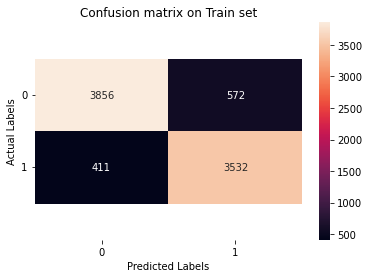

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4428
           1       0.86      0.90      0.88      3943

    accuracy                           0.88      8371
   macro avg       0.88      0.88      0.88      8371
weighted avg       0.88      0.88      0.88      8371



In [53]:
plt.title("Confusion matrix on Train set")
ax = sns.heatmap(confusion_matrix(train_y, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(train_y, pred))

In [54]:
# Get predictions from the test dataset
pred = dc.predict(test_x)
# print(pred.shape[0])
print("The test recall score is {}".format(np.round(recall_score(test_y, pred), 3)))

The test recall score is 0.896


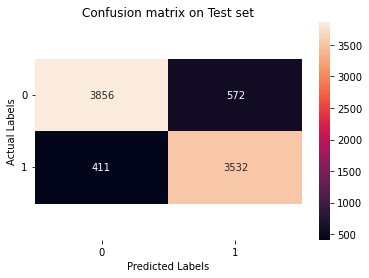

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4428
           1       0.86      0.90      0.88      3943

    accuracy                           0.88      8371
   macro avg       0.88      0.88      0.88      8371
weighted avg       0.88      0.88      0.88      8371



In [55]:
plt.title("Confusion matrix on Test set")
ax = sns.heatmap(confusion_matrix(test_y, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(test_y, pred))

# Random Forest Classifier

Cross validation scores: [0.87341772 0.87563452 0.87055838 0.86294416 0.85532995 0.91370558
 0.88324873 0.89086294 0.88607595 0.89367089]
0.88 recall with a standard deviation of 0.02
The train recall score is 1.0


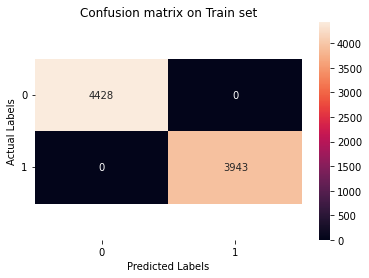

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4428
           1       1.00      1.00      1.00      3943

    accuracy                           1.00      8371
   macro avg       1.00      1.00      1.00      8371
weighted avg       1.00      1.00      1.00      8371

The test recall score is 1.0


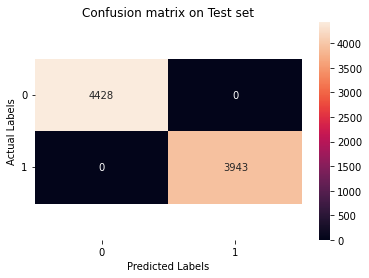

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4428
           1       1.00      1.00      1.00      3943

    accuracy                           1.00      8371
   macro avg       1.00      1.00      1.00      8371
weighted avg       1.00      1.00      1.00      8371



In [56]:
rf = RandomForestClassifier(n_jobs=-1, random_state=SEED, class_weight="balanced_subsample")

# Define a scorer
rs = make_scorer(recall_score)

# Cross validation
cv = cross_val_score(rf, train_x, train_y, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

# Fit the model on the complete train dataset
rf.fit(train_x, train_y)

# Get predictions from the train dataset
pred = rf.predict(train_x)
print("The train recall score is {}".format(np.round(recall_score(train_y, pred), 2)))

plt.title("Confusion matrix on Train set")
ax = sns.heatmap(confusion_matrix(train_y, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(train_y, pred))

# Get predictions from the test dataset
pred = rf.predict(test_x)
print("The test recall score is {}".format(np.round(recall_score(test_y, pred), 2)))

plt.title("Confusion matrix on Test set")
ax = sns.heatmap(confusion_matrix(test_y, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(test_y, pred))

In [57]:
pred = rf.predict(train_x)
for i in pred[:5]:
    print("For this user Profile: \n")
    print(train_x.head(i+1))
    if i==0:
        print('client will subscribe : No')
        print('\n\n\n\n\n')
    else:
        print('client will subscribe : Yes')
        print('\n\n\n\n\n')

For this user Profile: 

   age  education  balance  day  duration  campaign  pdays  previous  \
0   38          3      127   14       113         1     50         2   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0                0                 0  ...          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          0          0          1          0               0   

   poutcome_success  poutcome_unknown  
0                 1                 0  

[1 rows x 40 columns]
client will subscribe : No






For this user Profile: 

   age  education  balance  day  duration  campaign  pdays  previous  \
0   38          3      127   14       113         1     50         2   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0                0                 0  ...          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          0  

# Feature Importance according to Random Forest Classifier

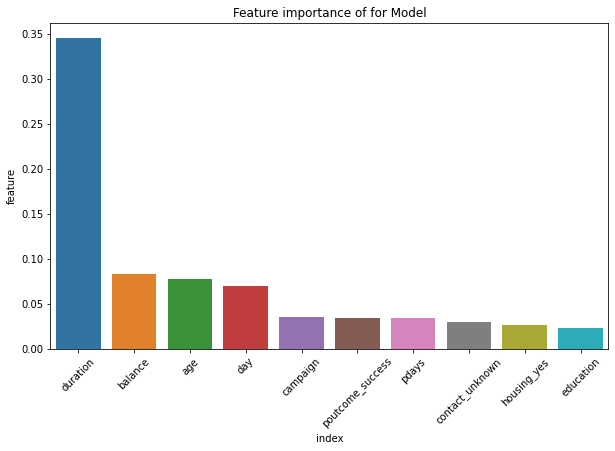

In [58]:
''' Build bar plot of feature importance of the best model '''
def build_feature_importance(model, X_train, y_train):
    rf.fit(X_train, y_train)
    data = pd.DataFrame(rf.feature_importances_, X_train.columns, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[10,6])
    sns.barplot(y='feature', x='index', data=data[:10])
    plt.title('Feature importance of for Model')
    plt.xticks(rotation=45)
    plt.show();
    
build_feature_importance(RandomForestClassifier, train_x, train_y)

Great! We achieved a perfect classifier on the test set! The best part is, we did not have to perform complex feature engineering. Just the basic one-hot encoding and label encoding on categorical variables.

* **If you find this helpful, I would really appreciate the upvote!**

* **If you see something wrong please let me know.**

* **And lastly Im happy to hear your thoughts about the notebook for me to also improve!**